# Kaggle Machine Learning Project
## Project: Titanic - Machine Learning from Disaster 

The problem to be solved is to predict the passengers that survive the Titanic. The goal is to use passenger characteristics and location to determine if a passenger is likely to die or survive. Based off the Kaggle prompt and the expected typed of output, this problem is a supervised classification problem. A potential way to solve this problem is to use a neural network classifier. For the sake of exploration, I hope to use other machine learning techniques like random forests and support vector machines to classify the passengers aboard the Titanic. The benchmark model will be a simple logistic regression. The score to determine usefulness of the solution is the accuracy, the percentage of passengers correctly predicted.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing, svm
# Pretty display for notebooks
%matplotlib inline

#Import Train Data and remove unusable information
train_df = pd.read_csv('Data/train.csv')

#Import Test Data
test_df = pd.read_csv('Data/test.csv')
test_df = test_df.drop('Cabin', axis = 1)
test_df = test_df.drop('Name', axis =1)
test_df = test_df.dropna()
test_df = test_df.drop('Ticket', axis =1)
test_x = test_df

# Success Check
print "Titanic Disaster training dataset has {} rows of data with {} variables each.".format(*train_df.shape)
print "Titanic Disaster testing dataset has {} rows of data with {} variables each.".format(*test_df.shape)

Titanic Disaster training dataset has 891 rows of data with 12 variables each.
Titanic Disaster testing dataset has 331 rows of data with 8 variables each.


## Data Exploration

The data can be described as

1. survival = Survival
1. pclass = Ticket class
1. sex = Sex	
1. Age = Age in years	
1. sibsp =	# of siblings / spouses aboard the Titanic	
1. parch =	# of parents / children aboard the Titanic	
1. ticket =	Ticket number	
1. fare = Passenger fare	
1. cabin =	Cabin number	
1. embarked =	Port of Embarkation

I used Pandas describe() function to explore the numbers data. However, this function does not take into consideration the data that involves strings such as: 'Name', 'Sex', 'Ticket', 'Cabin', and 'Embarked'. 'Sex' looks like a good candidate to change 'Male' and "Female' to binary values using one hot encoding. PassengerId doesn't mean much based on these statistics as its just a unique identifier for each individual. Pclass seems to show that most people were of Pclass 2 or 3. Age shows that most people were approximately 30 years old. The minimum and maximum also suggests that there are elderly and children on board. The count of the age being lower than other features indicates that there is missing data that has to be dealt with. Sibsp and Parch show that the majority of passengers came alone or possibly with friends depending on what the data represents. Fare seems to indicate that there were 3 ticket classes as the 25-75% quartiles seem fairly different. It is interesting to note that the mean seems to be in the 75% quartile of data possibly due to a few very large fares indicated by the max being $512. Cabin is most likely going to be removed as a feature because there is too much missing data and it would be hard to make conclusions when most people's information is unknown. It seems logical to remove Name as they are all unique identifiers represented by the PassengerID.

In [2]:
#Sneak peak of data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Grab list of keypoint names
#print features
print train_df.isnull().sum()
train_df.describe()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Visualization

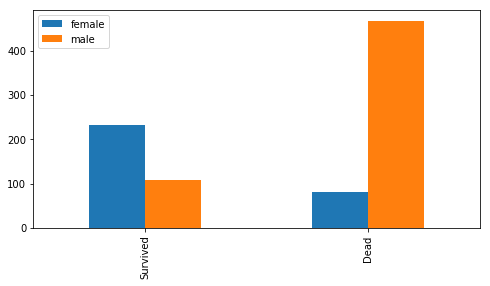

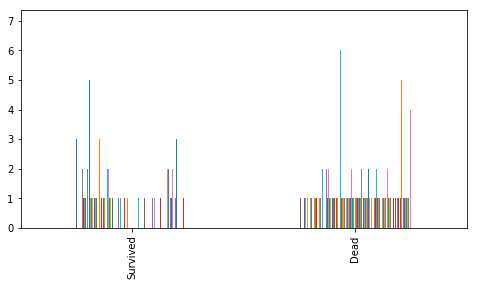

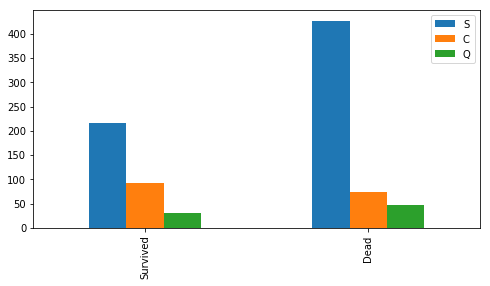

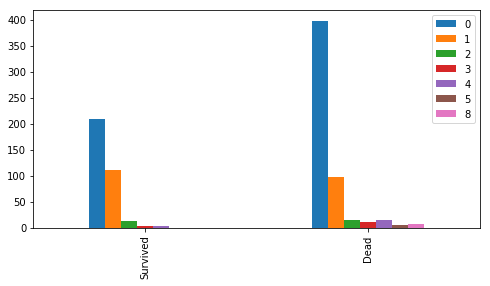

In [4]:
#Tables signifying data in relation to survival
sex_survive = train_df[train_df['Survived']==1]['Sex'].value_counts()
sex_dead = train_df[train_df['Survived']==0]['Sex'].value_counts()
sex_df = pd.DataFrame([sex_survive,sex_dead])
sex_df.index = ['Survived', 'Dead']
sex_df.plot(kind='bar', stacked = False, figsize=(8,4))

ticket_survive = train_df[train_df['Survived']==1]['Ticket'].value_counts()
ticket_dead = train_df[train_df['Survived']==0]['Ticket'].value_counts()
ticket_df = pd.DataFrame([ticket_survive,ticket_dead])
ticket_df.index = ['Survived', 'Dead']
ticket_df.plot(kind='bar', stacked = False, figsize = (8,4), legend=False)

age_survive = train_df[train_df['Survived']==1]['Age'].value_counts()
age_dead = train_df[train_df['Survived']==0]['Age'].value_counts()
age_df = pd.DataFrame([age_survive,age_dead])
age_df.index = ['Survived', 'Dead']
#age_df.plot(kind='bar', stacked = False, figsize = (8,4), legend=False)

pclass_survive = train_df[train_df['Survived']==1]['Pclass'].value_counts()
pclass_dead = train_df[train_df['Survived']==0]['Pclass'].value_counts()
pclass_df = pd.DataFrame([pclass_survive,pclass_dead])
pclass_df.index = ['Survived', 'Dead']
#pclass_df.plot(kind='bar', stacked = False, figsize = (8,4), legend=True)

emb_survive = train_df[train_df['Survived']==1]['Embarked'].value_counts()
emb_dead = train_df[train_df['Survived']==0]['Embarked'].value_counts()
emb_df = pd.DataFrame([emb_survive,emb_dead])
emb_df.index = ['Survived', 'Dead']
emb_df.plot(kind='bar', stacked = False, figsize = (8,4), legend=True)

sib_survive = train_df[train_df['Survived']==1]['SibSp'].value_counts()
sib_dead = train_df[train_df['Survived']==0]['SibSp'].value_counts()
sib_df = pd.DataFrame([sib_survive,sib_dead])
sib_df.index = ['Survived', 'Dead']
sib_df.plot(kind='bar', stacked = False, figsize = (8,4), legend=True)

## Preprocessed Data

In [5]:
train_df = train_df.drop('Cabin', axis =1)
train_df = train_df.drop('Name', axis = 1)
#Change female and male to integer values where male = 0 and female = 1
train_df['Sex'] = train_df['Sex'].map({'female':1, 'male': 0})
#Change embarked to S=0,C=1,Q=2
train_df['Embarked'] = train_df['Embarked'].map({'S':0, 'C':1, 'Q':2})
#Drop ticket because its difficult to deal with in classification and doesn't seem to associate towards survivability
train_df = train_df.drop('Ticket', axis = 1)
#Drop null values
train_df = train_df.dropna()

#Grab train_x without Survivors
train_x = train_df.drop('Survived', axis = 1)

#Grab train_y only with Survivors
features = list(train_x)
train_y = train_df.drop(features, axis = 1)


In [6]:
#Split train_x data into a training and testing set
#train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size = 0.20)
#print train_x.shape, train_y.shape, test_x.shape, test_y.shape

## Benchmark Model

In [7]:
regr = LogisticRegression()
regr.fit(train_x,train_y)
#print "The accuracy of the test set is %s." % regr.score(test_x, test_y.values.ravel())
#error_vals = mean_squared_error(y_test, regr.predict(X_test))**0.5
#print "The benchmark root mean squared error is %s" % error_vals

C:\Users\Nicholas\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Implementation - Support Vector Machines

In [8]:
#Implementation of Support Vector Machine
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(train_x, train_y.values.ravel())
#print svm_clf.predict(test_x)
#print "The accuracy of the test set is %s." % svm_clf.score(test_x, test_y.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Implementation - Random Forests

In [9]:
#Implementation of Random Forest
parameters = {'max_features': ['auto','sqrt','log2',None], 'n_estimators': [250,200], 'min_samples_leaf': [10,50]}
# Tried Grid Search and found out oob is another easier option
#rf_clf = GridSearchCV(RandomForestClassifier(verbose = 1, oob_score = True), parameters, n_jobs = 1, scoring = 'accuracy')
rf_clf = RandomForestClassifier(verbose = 2, n_estimators = 200, min_samples_leaf = 10, oob_score = True)
rf_clf.fit(train_x,train_y.values.ravel())
print rf_clf.oob_score_
#print "The accuracy of the test set is %s." % rf_clf.oob_score_

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.814606741573


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


In [10]:
#for feat, imp in zip(features, rf_clf.feature_importances_):
#    print(feat,imp)